## How do you tell a dog from a cat, or an apple from ~~samsung~~ orange?
- - - - 
Image feature is the simplest image pattern, which is the best descriptor of what we aim to identify . For example the shape of a cat's face and it's eyes will distinguish it from a dog so on and so forth. These image features transform visual information into vector space and allows us to perform mathematical operations on them. We can use a number of methods to find these image features. Two of the most popular are:
* Image Descriptors (White-box algorithms)
* Neural Nets (Black Box algorithms)

###  Image Feature Extraction
- - - - 
There are a number of algorithms that work really well for extracting features from an image, a few of them are as follows:
* Haar Cascades
* SIFT
* SURF
* BRIEF
These work by approximating image gradients and working above that. Let us see how a Haar cascade might work.

![Haar Features](images/haar_features.jpg)
These features or cascades are exactly like kernels in that, they slide over the image and calculate the feature. Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle. Let's see this in action shall we?

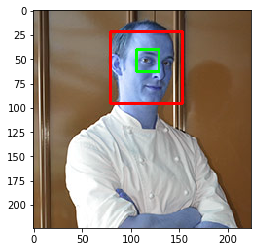

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")
img = cv.imread('images/human.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)




### Now Let's try that with deep learning
- - - - 
Due to time crunch, we haven't written a custom face detection module with TF but have used the cvlib library to detect faces from the image. The cvlib library makes use of the very famous yolo or *you only look once* object detection algorithm  which is built on the darknet-53 architectureFirst, YOLO v3 uses a variant of Darknet, which originally has 53 layer network trained on Imagenet. For the task of detection, 53 more layers are stacked onto it, giving us a 106 layer fully convolutional underlying architecture for YOLO v3.  It is slower than it's parents but it gets the job done pretty well (better accuracy)


![The man said it!](memes/deeper-meme.png)

- - - -


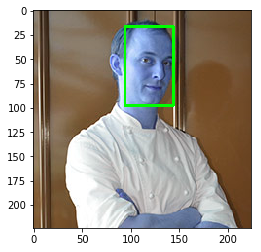

In [13]:
import cvlib as cvlib
from cvlib.object_detection import draw_bbox
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/human.jpg')
plt.imshow(img)
faces, confidences = cvlib.detect_face(img)

for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]

    cv.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)

plt.imshow(img)

### Classical Algorithms to Neural Nets right now
![Em' Feels!](memes/abhishek.jpg)

### Making the transition
- - - -
Before we make the jump to neural networks and CNN's let us first understand something that they have almost *borrowed* from classical image processing algorithms. **Kernels** have been around for a long time, they are similar to haar cascades. 
![Kernels and their types](graphs/conv-line-detection.jpg)
But Kernels due to their mathematical structure don't operate on images the same way as a haar cascade does. They perform a very specific operation known as **convolution**.
![Kernels performing convolution on a matrix](graphs/3D_Convolution_Animation.gif)
It is a matrix which we use to apply effects to images, such as blurring or sharpening. If you want to learn more about kernels go visit this absolute [website](http://setosa.io/ev/image-kernels/). 

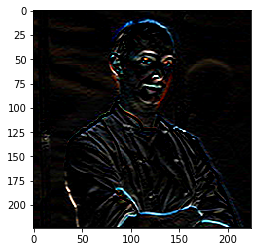

In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load image:
input_image = Image.open("images/human.jpg")

# The PixelAccess class provides read and write access to PIL.Image data at a pixel level.

input_pixels = input_image.load()

# Box Blur kernel
# the very basic low pass filter there is
blurr_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# a high pass filter that is meant to boost the pixel,
# if the neighbour pixels are different
sharpen_kernel = [[  0  , -.5 ,    0 ],
                   [-.5 ,   3  , -.5 ],
                   [  0  , -.5 ,    0 ]]

sobel_kernel = [[  1  , 0,-1],
                   [2 ,   0  , -2],
                   [  1 , 0 ,    -1]]


# Select kernel here:
kernel = sobel_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for i in range(offset, input_image.width - offset):
    for j in range(offset, input_image.height - offset):
        conv = [0, 0, 0]
        # conv is created to store the value of convolution
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = i + a - offset
                yn = j + b - offset
                pixel = input_pixels[xn, yn]
                conv[0] += pixel[0] * kernel[a][b]
                conv[1] += pixel[1] * kernel[a][b]
                conv[2] += pixel[2] * kernel[a][b]

        draw.point((i, j), (int(conv[0]), int(conv[1]), int(conv[2])))
    
plt.imshow(output_image)